date
05/10/2015 00:00     9.917
06/10/2015 00:00    10.322
07/10/2015 00:00    10.533
08/10/2015 00:00    10.533
09/10/2015 00:00    10.665
Name: clot, dtype: float64


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


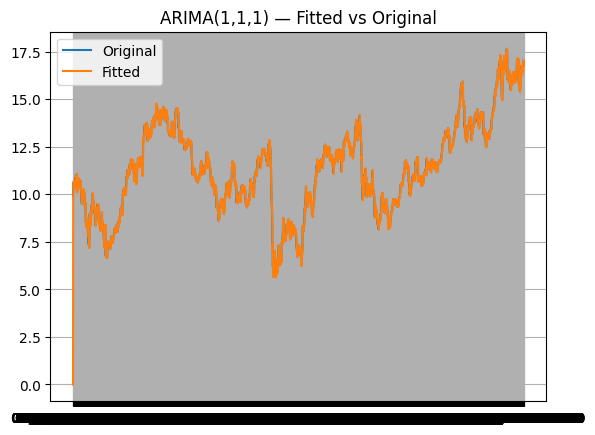

In [34]:
!wget -q https://raw.githubusercontent.com/Undeavor/PE28/main/CREDITAGRICOLESA_2025-10-05.txt -O CA.txt
df = pd.read_csv("/content/CA.txt", sep="\t",usecols=["date", "ouv", "haut", "bas", "clot", "vol", "devise"],index_col='date', parse_dates=["date"])
df = df["clot"]
#df=100*df.diff()
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
#df["logret"] = np.log(df)
#df["logret"].dropna(inplace=True)
print(df.head())
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm # Often useful for datasets or other tools

# Assume 'series_original' is your pandas Series containing the time series data
# It should have a DatetimeIndex. For example:
# rng = pd.date_range('2020-01-01', periods=100, freq='D')
# series_original = pd.Series(np.random.randn(100).cumsum() + 50, index=rng)

# Let's assume based on previous analysis (stationarity tests, ACF/PACF)
# we decided on an ARIMA(1, 1, 1) model.

from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(df, order=(1, 1, 1))
model_fit = model.fit()

plt.plot(df, label="Original")
plt.plot(model_fit.fittedvalues, label="Fitted")
plt.title("ARIMA(1,1,1) — Fitted vs Original")
plt.legend()
plt.grid(True)
plt.show()



# Fonction utilisable condensée

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

def predict_arima(filepath, order=(1,1,1), show_plot=True):
    """
    Charge un fichier, extrait la colonne 'clot', entraîne un ARIMA,
    et retourne les valeurs ajustées (fitted) + le modèle entraîné.

    Paramètres :
        filepath  : str   - chemin vers le fichier txt/csv
        order     : tuple - ordre ARIMA (p, d, q)
        show_plot : bool  - affiche ou non les graphiques

    Retour :
        model_fit : modèle ARIMA entraîné
        fitted    : valeurs ajustées (Series)
    """

    # Lecture des données
    df = pd.read_csv(
        filepath,
        sep="\t",
        usecols=["date", "ouv", "haut", "bas", "clot", "vol", "devise"],
        index_col="date",
        parse_dates=["date"]
    )

    # On garde uniquement la colonne de clôture
    series = df["clot"].replace([np.inf, -np.inf], np.nan).dropna()

    # ARIMA
    model = ARIMA(series, order=order)
    model_fit = model.fit()

    # Valeurs ajustées
    fitted = model_fit.fittedvalues

    # Graphique (optionnel)
    if show_plot:
        plt.plot(series, label="Original")
        plt.plot(fitted, label="Fitted")
        plt.title(f"ARIMA{order} — Observé vs Ajusté")
        plt.grid(True)
        plt.legend()
        plt.show()

    return model_fit, fitted